In [50]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define your image folders
train_dir = 'train'
validation_dir = 'val'

# Image dimensions and other parameters
img_width, img_height = 128,128
batch_size = 32
epochs = 10

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation loss: {loss:.4f}, Validation accuracy: {accuracy:.4f}")



Found 11273 images belonging to 2 classes.
Found 3536 images belonging to 2 classes.
Epoch 1/10
353/353 [==============================] - 909s 3s/step - loss: 0.2149 - accuracy: 0.8971 - val_loss: 0.5207 - val_accuracy: 0.8739
Epoch 2/10
353/353 [==============================] - 891s 3s/step - loss: 0.0110 - accuracy: 0.9969 - val_loss: 0.7364 - val_accuracy: 0.8589
Epoch 3/10
353/353 [==============================] - 900s 3s/step - loss: 1.2989e-04 - accuracy: 1.0000 - val_loss: 0.9827 - val_accuracy: 0.8637
Epoch 4/10
353/353 [==============================] - 913s 3s/step - loss: 2.8967e-05 - accuracy: 1.0000 - val_loss: 1.1368 - val_accuracy: 0.8572
Epoch 5/10
353/353 [==============================] - 912s 3s/step - loss: 1.4964e-05 - accuracy: 1.0000 - val_loss: 1.1723 - val_accuracy: 0.8589
Epoch 6/10
 79/353 [=====>........................] - ETA: 10:41 - loss: 1.0209e-05 - accuracy: 1.0000

KeyboardInterrupt: 

In [51]:
import matplotlib.pyplot as plt

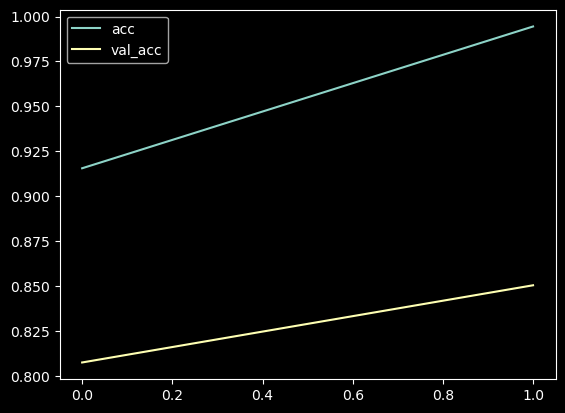

In [52]:
plt.plot(history.history['accuracy'],label = 'acc')
plt.plot(history.history['val_accuracy'],label = 'val_acc')
plt.legend()

In [53]:
import cv2 as cv
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [54]:
im = cv.imread("C:/Users/IIT JAMMU/Documents/Flipkart/train/Side/V12648.jpg",1)

In [55]:
model.predict(np.expand_dims(im, axis=0)/255)

1/1 [==============================] - 0s 103ms/step


array([[0.03588074]], dtype=float32)

In [42]:
im = cv.imread("C:/Users/IIT JAMMU/Documents/Flipkart/train/Top/V3137.jpg",1)
model.predict(np.expand_dims(im, axis=0)/255)

1/1 [==============================] - 0s 65ms/step


array([[0.9981583]], dtype=float32)

In [43]:
path ="C:/Users/IIT JAMMU/Documents/Flipkart/val/Side"
files = os.listdir(path)
arr = []
for i in files:
    im = cv.imread("C:/Users/IIT JAMMU/Documents/Flipkart/val/Side/"+str(i),1)
    a = model.predict(np.expand_dims(im, axis=0)/255.0, verbose=False)[0][0]
    arr.append(a)
    print(a)

0.3020698
0.33566648
0.4970577
0.011634025
0.024078386
0.04347484
0.16441059
0.135952
0.23254402
0.29609928
0.2396325
0.24947618
0.22254004
0.48780018
0.27476642
0.25047937
0.17523482
0.21350655
0.17176846
0.16499254
0.1414031
0.08815288
0.10994383
0.2606572
0.3705051
0.24601085
0.09480176
0.039734785
0.018749172
0.009041445
0.017510047
0.015491265
0.02412897
0.022268837
0.018528724
0.33785692
0.045546368
0.03700347
0.056456037
0.077288456
0.10461981
0.19422036
0.17858139
0.24819025
0.31114098
0.31596428
0.31266838
0.40361872
0.5297783
0.43760967
0.15426521
0.08904575
0.08544109
0.048756808
0.029633824
0.03108478
0.10157011
0.3150737
0.55645704
0.59801924
0.6014622
0.6107967
0.7623404
0.73152834
0.7071377
0.7029789
0.7756107
0.68533516
0.3699202
0.6073838
0.26497847
0.0962967
0.0029168911
0.00022073743
8.535261e-05
8.430297e-05
8.8382956e-05
0.00011191402
0.0001621251
0.42333096
0.00012760247
0.00029017468
0.00040814234
0.0005513963
0.00096774497
0.003823403
0.0037205084
0.0063650482
0

In [44]:
n = np.array(arr)


(array([350.,  73.,  58.,  54.,  41.,  45.,  62.,  54.,  76., 835.]),
 array([2.16082572e-05, 1.00019448e-01, 2.00017288e-01, 3.00015122e-01,
        4.00012970e-01, 5.00010788e-01, 6.00008667e-01, 7.00006485e-01,
        8.00004303e-01, 9.00002182e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

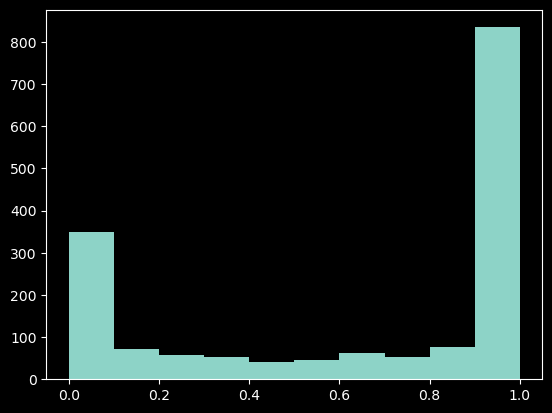

In [45]:
plt.hist(arr)

In [46]:
path ="C:/Users/IIT JAMMU/Documents/Flipkart/val/Top"
files = os.listdir(path)
arr = []
for i in files:
    im = cv.imread("C:/Users/IIT JAMMU/Documents/Flipkart/val/Top/"+str(i),1)
    a = model.predict(np.expand_dims(im, axis=0)/255.0, verbose=False)[0][0]
    arr.append(a)
    print(a)

0.99673814
0.9530827
0.9453547
0.9625402
0.97501516
0.98416924
0.9861539
0.98398226
0.9858577
0.98208284
0.9680697
0.9599673
0.9703068
0.964876
0.98267835
0.9887264
0.9886549
0.9901213
0.9935006
0.9922928
0.9836419
0.9868489
0.99302036
0.99735755
0.91991186
0.9965892
0.99595165
0.9967238
0.9967816
0.9973363
0.9975782
0.9967433
0.9937838
0.99700814
0.9964791
0.95256716
0.9952419
0.99578035
0.99181664
0.99383366
0.9962662
0.9965115
0.996505
0.99801767
0.99825025
0.9983268
0.9358135
0.9984675
0.9985096
0.99827456
0.99808913
0.99686325
0.99639404
0.99591744
0.994514
0.9940601
0.9947301
0.9100952
0.9961359
0.99638915
0.9949911
0.9923831
0.9916174
0.9921303
0.9939002
0.9909428
0.9875645
0.9848253
0.85460746
0.99076784
0.9936646
0.9925001
0.9931794
0.9928264
0.9931166
0.99594027
0.99547744
0.9918184
0.99147797
0.8763341
0.9952417
0.99642944
0.99712247
0.9977676
0.99630606
0.99583155
0.99660593
0.9974557
0.9980079
0.99851465
0.96136016
0.9957131
0.9889975
0.98071444
0.98993284
0.99670446
0.997

(array([ 268.,   52.,   28.,   24.,   26.,   28.,   18.,   22.,   40.,
        1382.]),
 array([1.80061454e-06, 1.00001618e-01, 2.00001433e-01, 3.00001264e-01,
        4.00001079e-01, 5.00000894e-01, 6.00000739e-01, 7.00000525e-01,
        8.00000370e-01, 9.00000155e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

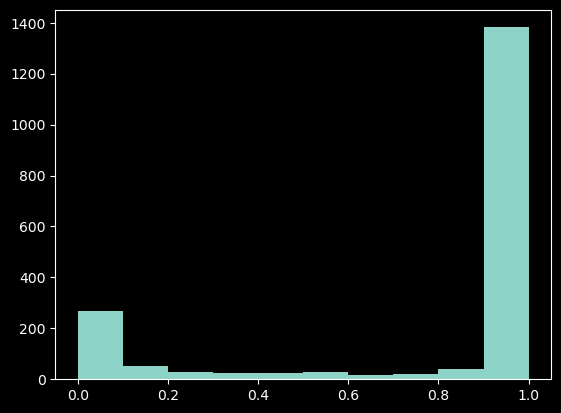

In [47]:
plt.hist(arr)

In [56]:
import cv2
import os

cam = cv2.VideoCapture(0)



frameno = 0
while(True):
    ret,frame = cam.read()
    a = model.predict(np.expand_dims(cv2.resize(frame,(128,128)), axis=0)/255.0, verbose=False)[0][0]
    text=0


    if a>0.5:
        text=1


    frame = cv2.putText(cv2.resize(frame,(128,128)),str(text),(20,50),cv2.FONT_HERSHEY_SIMPLEX,2,(255,255,255),8)
    cv2.imshow("Image",frame)
    print(a)
    key = cv2.waitKey(30)
    if key==27:
        break

cam.release()
cv2.destroyAllWindows()


1.5729421e-07
1.1650961e-07
2.083414e-07
3.2602788e-06
5.6820236e-06
0.00013454967
1.9703193e-06
1.37257e-07
1.10243455e-07
5.1409273e-08
2.2726649e-08
1.5443932e-08
3.403394e-08
2.5994579e-08
1.4114097e-08
1.5902144e-08
1.1913041e-08
6.8941475e-09
6.108109e-09
4.1928443e-09
3.978589e-09
1.7510184e-08
9.8327675e-08
2.4438805e-07
8.709602e-09
6.701872e-09
4.386546e-08
2.9126989e-08
6.273075e-06
5.3382473e-06
0.00022464844
0.014828305
7.5295884e-07
1.5116735e-08
2.5885146e-07
3.4127414e-08
1.6692725e-08
8.014959e-06
0.023398561
8.489799e-06
5.246602e-06
0.00075585465
0.34914297
0.38286653
0.008899671
0.007669242
0.0415981
0.064659156
0.024061278
0.016359415
0.024667544
0.007454883
0.01162799
0.0023097873
0.007006455
0.00039969006
0.00054001575
0.0003547426
0.0002562357
3.9813993e-05
7.676114e-06
3.4870297e-06
1.2524994e-06
3.5641904e-07
1.4063797e-07
1.6951773e-07
4.946094e-07
4.7276373e-07
1.3144194e-06
9.421943e-07
0.0021637816
0.52763116
0.20154372
0.00022067745
1.8847578e-06
6.544374

In [ ]:
import cv2

# Load an image containing a QR code
image = cv2.imread('qr_code_image.png')

# Initialize the QR code detector
qr_code_detector = cv2.QRCodeDetector()

# Detect and decode QR codes from the image
retval, decoded_info, points, _ = qr_code_detector.detectAndDecodeMulti(image)

# Check if a QR code was detected
if retval:
    for info in decoded_info:
        print("Decoded QR code:", info)
else:
    print("No QR code detected")

# Display the image
cv2.imshow('QR Code Detection', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [60]:
import cv2
import os

cam = cv2.VideoCapture(0)



frameno = 0
while(True):
    ret,frame = cam.read()
    qr_code_detector = cv2.QRCodeDetector()

    # Detect and decode QR codes from the image
    retval, decoded_info, points, _ = qr_code_detector.detectAndDecodeMulti(frame)
    cv2.imshow("",frame)
    key = cv2.waitKey(30)
    print(retval)
    if key==27:
        break

cam.release()
cv2.destroyAllWindows()


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [62]:
import cv2
import pyrealsense2